# Homework 5: Confidence Intervals, Autograders, Freethrows
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday April 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [39]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import sklearn
from scipy import stats
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [37]:
#set paths and load them with proper delimiters
white_path = './data/winequality-red.csv'
red_path = './data/winequality-white.csv'
red = pd.read_csv(red_path, sep=';')
white = pd.read_csv(white_path, sep=';')
#did it work - yes
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

We are justified because we can treat our data sets for red and white wine as a set of samples from a larger population that is all red and white portuguese vinho verde wines respectively. We have samples from this population for various attributes that are either continuous or discrete variables. The means of these variables can be estimated using the central limit theorem, because these attributes are sampled from the same distribution functions. We are also analysing the red and white wines independently, which matters because red and white wines probably have different distributions, but also they have different sample sizes. Basically they are indeed identical samples and independent.

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [38]:
#Get the means
rMean = red['alcohol'].mean()
wMean = white['alcohol'].mean()

#Standard deviations
rStd = red['alcohol'].std()
wStd = white['alcohol'].std()

#sample sizes
rN = red.shape[0]
wN = white.shape[0]

#Z value
z = 1.960

#actual intervals
redInterval = z*((rStd)/(rN**0.5))
whiteInterval = z*((wStd)/(wN**0.5))

#Print the findings i guess
print("95% confidence interval for the red wines is {0:.5} +- {1:.2}".format(rMean, redInterval))
print("95% confidence interval for the white wines is {0:.5} +- {1:.2}".format(wMean, whiteInterval))

95% confidence interval for the red wines is 10.514 +- 0.034
95% confidence interval for the white wines is 10.423 +- 0.052


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

In [36]:
#difference of means, z-value stays the same
diffOfMeans = rMean - wMean
interval = z*(((rStd**2)/(rN))+((wStd**2)/(wN)))**0.5
print("95% confidence interval for the difference between the means of the alcohol content of red and white wine is {0:.2} +- {1:.3}".format(diffOfMeans, interval))

95% confidence interval for the difference between the means of the alcohol content of red and white wine is 0.091 +- 0.0626


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

Basically, 95% of the time the difference between the average alcohol contents of the red and the white will fall somehwere on that interval. However, the samples are different sizes so I'm not really sure if this is a comparison you can make.

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [68]:
CA = 1204
CB = 1099
CO = 205
N = CB+CA+CO
pa = (CA/N)
pb = (CB/N)
po = (CO/N)
sa = ((pa*(1-pa))/(N))**0.5
sb = ((pb*(1-pb))/(N))**0.5
so = ((po*(1-po))/(N))**0.5
print("""The electron results are:
Candidate A: {0:.4} +- {3:.4}%
Candidate B: {1:.4} +- {4:.4}%
Other: {2:.4} +- {5:.4}%
""".format(pa*100, pb*100, po*100, sa*100, sb*100, so*100))

The electron results are:
Candidate A: 48.01 +- 0.9976%
Candidate B: 43.82 +- 0.9907%
Other: 8.174 +- 0.5471%



**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [280]:
na = sa*N
nb = sb*N
no = so*N
print("""
Election poll results are:
Candidate A: {0} +- {1:.2g}
Candidate B: {2} +- {3:.2g}
Other: {4} +- {5:.2g}
""".format(CA, na, CB, nb, CO, no))


Election poll results are:
Candidate A: 1204 +- 25
Candidate B: 1099 +- 25
Other: 205 +- 14



They could pretty confidently report the election outcomes at this stage. A is winning and we can say with 95% certainty that the true number of votes for A will be at least as high as 1179, and we can say with the same certainty that candidate B will receive no more than 1124 votes, and in this case, A still wins. If it were me I'd just wait until the next day though to be safe.

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing a confidence interval for proportion we use the actual sample proportion to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


I'd say we could get a worst case scenario by assuming that literally everyone votes for one candidate, which is pretty unlikely. When doing this, we get 1 over the root of N as our margin of error, and if we set that margin to 0.02, we find that N must be at least 2500.

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

In [281]:
yes_10 = 603
no_10 = 656
n_10 = 1259
yes_16 = 1126
no_16 = 717
n_16 = 1843
p1 = yes_10/n_10
p2 = yes_16/n_16
std = (((p1*(1-p1))/(n_10))+((p2*(1-p2))/(n_16)))
z = 1.960
i = z*std
print("""
The confidence interval for the change of proportion of the population
that supports the legalization of marijuana is:
{0:.4}% +- {1:.4}%
This is interepreted as the percent increase in support plus and minus an 
error bound.
""".format((p2-p1)*100, i*100))


The confidence interval for the change of proportion of the population
that supports the legalization of marijuana is:
13.2% +- 0.06413%
This is interepreted as the percent increase in support plus and minus an 
error bound.



**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

It is quite likely that the proportion supporting legalization changed. The percent increase was 13%, and the confidence interval for that is +- less than 1%, so it's likely that the true increase in support for marijuana legalization is somewhere around 13%.

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [71]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

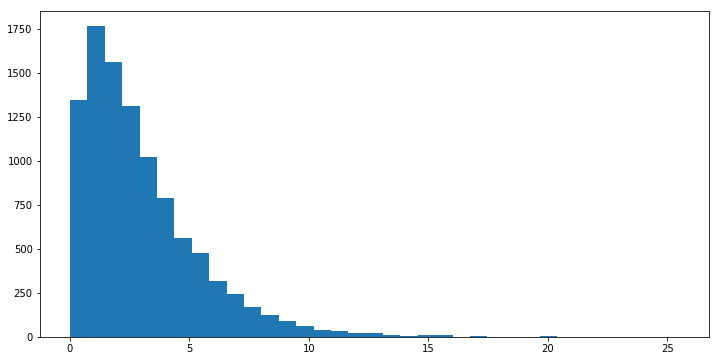

In [84]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# TODO
ax.hist(x, bins=35)
plt.show()

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

Mean Value is k which is 3. Variance is 2k which is 6.

**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

In [182]:
def confidence_intervals(m=500, n=100):
    # TODO
    k = 3
    means = []
    intervals = []
    #generate the samples
    covered = 0
    for i in range(m):
        x = chi2.rvs(k, size=n)
        mean = np.mean(x)
        means.append(mean)
        interval= (1.960*((np.std(x))/(n**0.5)))
        intervals.append(interval)
        if(abs(mean-3)<interval):
            covered+=1
    proportion_covered = covered/m
    print("{0:.3}% of the intervals contain the true mean.".format(proportion_covered*100))
    indices = np.random.choice(np.arange(m), size=50, replace=False)
    
    #plotting
    y = [means[i] for i in indices]
    margins = [intervals[i] for i in indices]
    # Initialize figure 
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot([0, 50], [3, 3])
    for ix, i in enumerate(indices):
        cmin, cmax = (means[i]-intervals[i]),(means[i]+intervals[i])
        if(abs(means[i]-3)<intervals[i]):
            c='black'
        else:
            c='red'
        ax.plot([ix, ix], [cmin,cmax], color=c)

95.0% of the intervals contain the true mean.


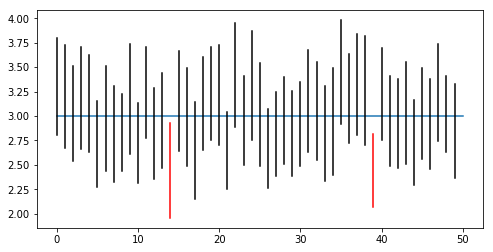

In [183]:
confidence_intervals()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yeah. That is literally the definition of the confidence interval, so it makes since that 95% of the samples have a confidence interval that covers the true mean.

### [15 points] Problem 5 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [284]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you his solution to the problem which is shown below: 

In [285]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to his own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above. 

My autograder will use an independent t-test to compare the proportion. I figure this is good because if we can confidently say that 0 falls within the confidence interval of the difference of the means, then we know that the student's answer was probably the same as the professors.

In [291]:
def autograder(pf, st, alpha=0.05):
    # TODO
    if alpha==0.05:
        z=1.960
    else:
        z=1.960#fix this later to just calculate z
    
    #get means and standard deviations
    pmean = np.mean(pf)
    smean = np.mean(st)
    pstd = np.std(pf)
    sstd = np.std(st)
    pn = len(pf)
    sn = len(st)
    
    #get interval
    pi = z*(pstd/(pn**0.5))
    si = z*(sstd/(sn**0.5))
    
    #now get proportion of sample that falls in the 95% interval
    p1 = 0
    p2 = 0
    for val in pf:
        if(abs(val-mean)<pi):
            p1+=1
    for val in st:
        if(abs(val-mean)<si):
            p2+=1
    
    #calc proportions
    p1 = p1/pn
    p2 = p2/sn
    
    #now get interval for difference of proportions
    interval = z*(((p1*(1-p1))/(pn))+((p2*(1-p2))/(sn)))**0.5
    diff = p1-p2
    
    #now see if 0 is in that interval
    if(abs(diff)<interval):
        passed=True
    else:
        passed=False
    
    if passed:
        return "Passed"
    else:
        return "Failed"

In [295]:
mp, dp = prof()
ms1, ds1 = student1()
ms2, ds2 = student2()
ms3, ds3 = student3()
print("Student 1 "+autograder(dp, ds1))
print("Student 2 "+autograder(dp, ds2))
print("Student 3 "+autograder(dp, ds3))

Student 1 Failed
Student 2 Passed
Student 3 Failed


**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

### [15 points] Problem 6 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the third Jack.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes. Compute the mean, median, and mode for this dataset, indicate them on the plot too. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

In [205]:
from random import shuffle

In [259]:
def num_before_jacks():
    #init deck
    deck = []
    for i in range(2, 15):
        for j in range(4):
            deck.append(i)
    shuffle(deck)

    #now draw some cards i guess
    jacks = 0
    draws = 0
    while(jacks<3):
        card = deck.pop()
        draws+=1
        if(card==11):#11 is the value of our jack
            jacks+=1
    return draws

In [260]:
num_before_jacks()

26

In [272]:
def more_times(n=1000):
    #do it many times
    draws = []
    for i in range(n):
        num = num_before_jacks()
        draws.append(num)
    mean = np.mean(draws)
    std = np.std(draws)
    median = np.median(draws)
    mode = max(set(draws), key=draws.count)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.hist(draws, bins=len(set(draws)))
    ax.set_xticks(np.arange(26)*2)
    ax.axvline(x=mean, color='r', label='Mean')
    ax.axvline(x=median, color='g', label='Median')
    ax.axvline(x=mode, color='k', label='Mode')
    ax.set_title("Number of draws until 3 jacks are drawn from a deck")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#show the legend

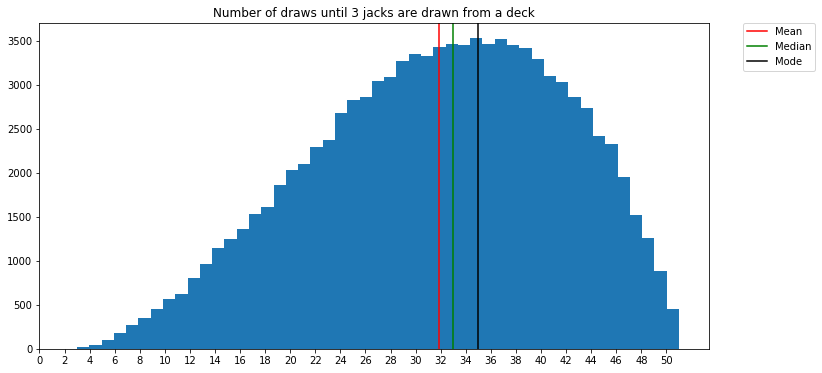

In [273]:
more_times(100000)

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Jerry Ferguson and Steve Ferguson. You prepare to take anotter shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

Generallly, a 99% confidence interval is wider. The wider the interval, the more likely it is for the real value to fall in it. To do some sanity checks, an infinitely wide interval will cover the mean 100% of the time. An infinitely small (but not 0) interval will probably cover the mean close to 0% of the time. So, generally, the higher the percent in the confidence interval, the wider the interval.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the standard deviation.
***

In [185]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [189]:
z = 1.960
std = np.std(durant)
sqrtn = durant.shape[0]**0.5
mean = np.mean(durant)
mr_interval = z*(std/sqrtn)
print("The 95% confidence interval for the given sample is {0:.3} +- {1:.3}".format(mean, mr_interval))

The 95% confidence interval for the given sample is 3.95 +- 0.0668


**Part D**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Maureen Ferguson. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. Ferguson suggests that you do the following CSCI3022 problem:</font>

You collect 53 samples of hair from baby river otters and find that they are, on average, 22.6 mm long, with a standard devaition of 15.2mm. 

Then you collect 41 samples of hair from baby sea otters and find that they are, on average, 26.4 mm long, with a standard deviation of 11.4 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm?  Use a test of your choice.

***

In [196]:
alpha = 0.05
z= 1.960
# _r for river otters, _b for baby sea otters
n_r = 53
mean_r = 22.6#lol mean otters
std_r = 15.2
n_b = 41
mean_b = 26.4
std_b = 11.4

#now for other shenanigans
diff = mean_b - mean_r
i = z*(((std_r**2)/(n_r))+((std_b**2)/(n_b)))**0.5
print("Confidence interval: {0:.4} +- {1:.4}".format(diff, i))

Confidence interval: 3.8 +- 5.378


There is not statistical evidence for this claim. Or at least the data given does not support the claim. The confidence interval is greater than the difference of the means, so it's quite possible that the true mean for baby sea otters is actually less than the true mean of river otters or vice versa. We do not have sufficient data to say. 

**Part E**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

I would rather have a low type II error. In this case, Type I error means you marked carbon fiber as insufficient even though it actually is ok, and Type II error means you have marked the carbon fiber as ok even though it actually isn't. I'd much rather stay on the safe side and have a low chance of marking faulty carbon fiber as ok.